# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. 

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

# Summary of Findings

### Introduction

1. This is a dataset of 1534 power outage events happened in United States across different states.
2. It contains columns that describe year, month, state, causation, outage start date, outage restoration date, outage duration, number of customers affected information of each power outage event.
3. I chose columns of number of customers affected and outage durations to represent the extent of influence of power outage events and use groupby and aggregate functions to investigate whether events happened in different states and caused by different reasons would have different extent of influence.

### Cleaning and EDA
#### Cleaning
1. After reading in power outage dataset, I first dropped top 4 rows since they are headers of the dataset and many entries are NaN values. Then, I dropped the column 'Major power outage events in the continental U.S' because all entries in this column are NaN values as well.
2. When I looked into new power outage dataset, I found that each entry in the first row describes values in each column and each entry in the second row is unit of values in corresponding column. So, I combined first two rows and rename dataset's columns using entries in combined rows.
3. Then I dropped first two rows, reset index, and took only columns that I want.

#### Univariate Analysis
1. Histogram of Distribution of Power Outage Occurrences In Each Month
    - power outage events occur more often in June, July, and August
    - power outage events occur least often in November
2. Bar Plot of Distribution of Power Outage Occurrences In Each State
    - power outage events occur most often in Minnesota
    - power outage events occur least often in Alaska.
3. Bar Plot of Distribution of Power Outage Occurrences By Different Reason
    - half of power outage events were caused by severe weather
    - similar number of power outage events were caused by equipment failure, public appeal, fuel supply emergency, and islanding
4. Statistics calculated from `OUTAGE.DURATION (Days)` 
    - calculated 25% and 75% percentile of `OUTAGE.DURATION (Days)`
    - most power outage events last between 0 days 1 hour 42 minutes and 2 days
    - calculated median, average, minimum, maximum power outage durations in days
    - the outage event with maximum duration happened in Wisconsin in January 2014 and it was caused by fuel supply emergency.
5. Statistics calculated from `CUSTOMERS.AFFECTED` 
    - calculated 25% and 75% percentile of `CUSTOMERS.AFFECTED`
    - most of number of customers affected are between 9650 and 150000
    - calculated median, average, minimum, maximum number of customers affected
    - power outage event that affects most number of customers happened in Florida in October 2010 and it was caused by severe weather
    
#### Bivariate Analysis

1. Boxplot of outage durations based on different causations of outage events
    - events caused by fuel supply emergency have largest median outage durations and largest duration range
    - events caused by severe weather have the second largest median outage durations
    - events caused by equipment failure have the second largest duration range
    - events caused by system operability disruption, equipment failure, and islanding do not have long outage durations.
2. Scatterplot of outage duration in minutes and number of customers affected
    - want to check if outage duration in minutes is positively correlated with number of customers affected
    - the scatterplot does not show a positive relationship between outage duration in minutes and number of customers affected
3. Scatterplot of `CUSTOMERS.AFFECTED` And `OUTAGE.DURATION (Mins)`
    - want to check if number of customers affected is positively associated with amount of peak demand lost
    - the scatterplot shows a somewhat positive association between two variables
4. Pivot Table of  `CAUSE.CATEGORY` And `CLIMATE.CATEGORY`
    - want to examin in each weather condition, which `CAUSE.CATEGORY` can cause outage events with the largest extent of influence on customers and power outage durations on average
    - in cold and normal weather conditions, outage events caused by system operability disruption affect the largest number of customers on average
    - while in warm weather condition, outage events caused by severe weather affect the largest number of customers on average
    - events caused by fuel supply emergency have longest outage duration on average in all three weather conditions

#### Aggregates
1. I groupped by U.S. states and calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that the outage event with longest average outage duration happened in Wisconsin and the outage event that affected the largest number of customers on average happened in Florida.
2. I groupped by causes of outage events and calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that fuel supply emergency caused the outage event with longest average outage duration in minutes and system operability disruption caused the outage event that affected the largest number of customers on average.
3. I groupped by causes of outage events and month. Then I calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that fuel supply emergency in January caused the outage event with longest average outage duration in minutes and system operability disruption in September caused the outage event that affected the largest number of customers on average.

### Assessment of Missingness
I believe that data in `HURRICANE.NAMES` is NMAR. When `CAUSE.CATEGORY.DETAIL` is hurricane, then `HURRICANE.NAMES` is not null and contains the hurricane name that causes the power outage event. If the cause of outage events is not hurricane or not specified, the name of hurricane that causes outage event is null.

Then I chose to analyze the missingness of `CUSTOMERS.AFFECTED` and its dependency on `OUTAGE.DURATION (Mins)` and `TOTAL.PRICE (cts/kWh)`.

**Null Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` does not depend on `OUTAGE.DURATION (Mins)`/ `TOTAL.PRICE (cts/kWh)`

**Alternative Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` depends on `OUTAGE.DURATION (Mins)`/ `TOTAL.PRICE (cts/kWh)`

**Test Statistic:** Difference in means of `OUTAGE.DURATION (Mins)`/ `TOTAL.PRICE (cts/kWh)` in null and not null group

**Significance Level:** 0.05 (5%)

**Conclusions:** 
1. Since p-value is 0.024 and it is less than significance level of 0.05, we reject the null hypothesis that missingness of `CUSTOMERS.AFFECTED` is not dependent on `OUTAGE.DURATION (Mins)`.
2. Since p-value is 0.453 and it is greater than significance level of 0.05, we fail to reject the null hypothesis that missingness of `CUSTOMERS.AFFECTED` is not dependent on `TOTAL.PRICE (cts/kWh)`.


### Hypothesis Test
**Hypothesis Question:** On average, is number of customers affected by outage events caused by severe weather more than number of customers affected by outage events caused by other reasons?

**Null Hypothesis:** On average, number of customers affected by outage events caused by severe weather is approximately the same with number of customers affected by outage events caused by other reasons.

**Alternative Hypothesis:** On average, number of customers affected by outage events caused by severe weather is more than number of customers affected by outage events caused by other reasons.

**Significance Level:** 0.05 (5%)

**Test Statistic:** The average number of customers affected from each random sample.

**Simulation Test Setup:** Sample uniformly (without replacement) 763 power outage events (same number with the number of outage events caused by severe weather) from outage dataframe. Then, calculate the average number of customers affected from each random sample.

**Conclusion:** Since p-value is 0.0 and it is less than significance level of 0.05, we reject the null hypothesis that on average, number of customers affected by outage events caused by severe weather is approximately the same with number of customers affected by outage events caused by other reasons.

# Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

### Cleaning

After reading in power outage dataset, I first dropped top 4 rows since they are headers of the dataset and many entries are NaN values.  Then, I dropped the column 'Major power outage events in the continental U.S' because all entries in this column are NaN values as well.

In [2]:
power_outage = pd.read_excel('outage.xlsx')
power_outage = power_outage.loc[4:].drop(columns=['Major power outage events in the continental U.S.'])

When I looked into new power outage dataset, I found that each entry in the first row describes values in each column and each entry in the second row is unit of values in corresponding column. So, I combined first two rows and rename dataset's columns using entries in combined rows.

In [3]:
# replace each unit in second row of the dataset with their abbreviations. For example, I use MW to represent Megawatt.
print(power_outage.iloc[1].unique())
replaced_vals = ['', '', ' (Y:M:D)', ' (H:M:S)', ' (Mins)', ' (MW)', ' (cts/kWh)', ' (Mh)', ' (%)', ' ($)',
                 ' (/)', ' (PPSM)']
power_outage.iloc[1] = power_outage.iloc[1].replace(dict(zip(power_outage.iloc[1].unique(), replaced_vals)))

[nan 'numeric' 'Day of the week, Month Day, Year'
 'Hour:Minute:Second (AM / PM)' 'mins' 'Megawatt' 'cents / kilowatt-hour'
 'Megawatt-hour' '%' 'USD' 'fraction' 'persons per square mile']


In [4]:
# Rename the column using the combined first two rows
power_outage.columns = power_outage.iloc[0] + power_outage.iloc[1]
power_outage.columns

Index(['OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE (Y:M:D)', 'OUTAGE.START.TIME (H:M:S)',
       'OUTAGE.RESTORATION.DATE (Y:M:D)', 'OUTAGE.RESTORATION.TIME (H:M:S)',
       'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES',
       'OUTAGE.DURATION (Mins)', 'DEMAND.LOSS.MW (MW)', 'CUSTOMERS.AFFECTED',
       'RES.PRICE (cts/kWh)', 'COM.PRICE (cts/kWh)', 'IND.PRICE (cts/kWh)',
       'TOTAL.PRICE (cts/kWh)', 'RES.SALES (Mh)', 'COM.SALES (Mh)',
       'IND.SALES (Mh)', 'TOTAL.SALES (Mh)', 'RES.PERCEN (%)',
       'COM.PERCEN (%)', 'IND.PERCEN (%)', 'RES.CUSTOMERS', 'COM.CUSTOMERS',
       'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT (%)',
       'COM.CUST.PCT (%)', 'IND.CUST.PCT (%)', 'PC.REALGSP.STATE ($)',
       'PC.REALGSP.USA ($)', 'PC.REALGSP.REL (/)', 'PC.REALGSP.CHANGE (%)',
       'UTIL.REALGSP ($)', 'TOTAL.REALGSP ($)', 'UTIL.CONTRI (%)',
       'PI.UT

In [5]:
columns_want = ['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'CLIMATE.CATEGORY','OUTAGE.START.DATE (Y:M:D)',
                'OUTAGE.START.TIME (H:M:S)', 'OUTAGE.RESTORATION.DATE (Y:M:D)', 'OUTAGE.RESTORATION.TIME (H:M:S)',
       'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE.DURATION (Mins)', 'DEMAND.LOSS.MW (MW)',
            'CUSTOMERS.AFFECTED', 'TOTAL.PRICE (cts/kWh)']
# drop first two rows, reset index, take only columns that I want
power_outage = power_outage.drop([4, 5]).reset_index().drop(columns = ['index', 'OBS'])[columns_want]

In [6]:
power_outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,CLIMATE.CATEGORY,OUTAGE.START.DATE (Y:M:D),OUTAGE.START.TIME (H:M:S),OUTAGE.RESTORATION.DATE (Y:M:D),OUTAGE.RESTORATION.TIME (H:M:S),CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION (Mins),DEMAND.LOSS.MW (MW),CUSTOMERS.AFFECTED,TOTAL.PRICE (cts/kWh)
0,2011,7,Minnesota,MN,normal,2011-07-01 00:00:00,17:00:00,2011-07-03 00:00:00,20:00:00,severe weather,NaN,NaN,3060,NaN,70000,9.28
1,2014,5,Minnesota,MN,normal,2014-05-11 00:00:00,18:38:00,2014-05-11 00:00:00,18:39:00,intentional attack,vandalism,NaN,1,NaN,NaN,9.28
2,2010,10,Minnesota,MN,cold,2010-10-26 00:00:00,20:00:00,2010-10-28 00:00:00,22:00:00,severe weather,heavy wind,NaN,3000,NaN,70000,8.15
3,2012,6,Minnesota,MN,normal,2012-06-19 00:00:00,04:30:00,2012-06-20 00:00:00,23:00:00,severe weather,thunderstorm,NaN,2550,NaN,68200,9.19
4,2015,7,Minnesota,MN,warm,2015-07-18 00:00:00,02:00:00,2015-07-19 00:00:00,07:00:00,severe weather,NaN,NaN,1740,250,250000,10.43


I combined power outage start date and time columns `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into one datetime column `OUTAGE.START`. I also combined `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into new datetime column called `OUTAGE.RESTORATION`. Then I dropped start date, time and restoration date, time columns and only kept the combined columns. I added a column `OUTAGE.DURATION (Days)`.


In [7]:
# Since start date, time and restoration date, time columns have NaN values, so I set errors = coerce
power_outage['OUTAGE.START'] = pd.to_datetime(power_outage['OUTAGE.START.DATE (Y:M:D)'].apply(str) + 
                                     ' ' + power_outage['OUTAGE.START.TIME (H:M:S)'].apply(str), errors = 'coerce')
power_outage['OUTAGE.RESTORATION'] = pd.to_datetime(power_outage['OUTAGE.RESTORATION.DATE (Y:M:D)'].apply(str) + 
                                     ' ' + power_outage['OUTAGE.RESTORATION.TIME (H:M:S)'].apply(str), errors = 'coerce')

In [8]:
power_outage = power_outage.drop(columns = ['OUTAGE.START.DATE (Y:M:D)', 'OUTAGE.START.TIME (H:M:S)',
                                            'OUTAGE.RESTORATION.DATE (Y:M:D)', 'OUTAGE.RESTORATION.TIME (H:M:S)'])

In [9]:
power_outage['OUTAGE.DURATION (Days)'] = power_outage['OUTAGE.RESTORATION'] - power_outage['OUTAGE.START']

In [10]:
# convert the type of values in 'OUTAGE.DURATION (Mins)', 'CUSTOMERS.AFFECTED', 'TOTAL.PRICE (cts/kWh)' to float 
power_outage['OUTAGE.DURATION (Mins)'] = power_outage['OUTAGE.DURATION (Mins)'].astype(float)
power_outage['CUSTOMERS.AFFECTED'] = power_outage['CUSTOMERS.AFFECTED'].astype(float)
power_outage['TOTAL.PRICE (cts/kWh)'] = power_outage['TOTAL.PRICE (cts/kWh)'].astype(float)

In [11]:
power_outage.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION (Mins),DEMAND.LOSS.MW (MW),CUSTOMERS.AFFECTED,TOTAL.PRICE (cts/kWh),OUTAGE.START,OUTAGE.RESTORATION,OUTAGE.DURATION (Days)
0,2011,7,Minnesota,MN,normal,severe weather,NaN,NaN,3060.0,NaN,70000.0,9.28,2011-07-01 17:00:00,2011-07-03 20:00:00,2 days 03:00:00
1,2014,5,Minnesota,MN,normal,intentional attack,vandalism,NaN,1.0,NaN,NaN,9.28,2014-05-11 18:38:00,2014-05-11 18:39:00,0 days 00:01:00
2,2010,10,Minnesota,MN,cold,severe weather,heavy wind,NaN,3000.0,NaN,70000.0,8.15,2010-10-26 20:00:00,2010-10-28 22:00:00,2 days 02:00:00
3,2012,6,Minnesota,MN,normal,severe weather,thunderstorm,NaN,2550.0,NaN,68200.0,9.19,2012-06-19 04:30:00,2012-06-20 23:00:00,1 days 18:30:00
4,2015,7,Minnesota,MN,warm,severe weather,NaN,NaN,1740.0,250,250000.0,10.43,2015-07-18 02:00:00,2015-07-19 07:00:00,1 days 05:00:00


In [12]:
power_outage.shape

(1534, 15)

### Univariate Analysis

#### Distribution of Power Outage Occurrences In Each Month
I visualized the distribution of number of power outage events in each month to see which month has more power outage events. From the plot, I found that power outage events occur more often in June, July, and August, while power outage events occur least often in November.

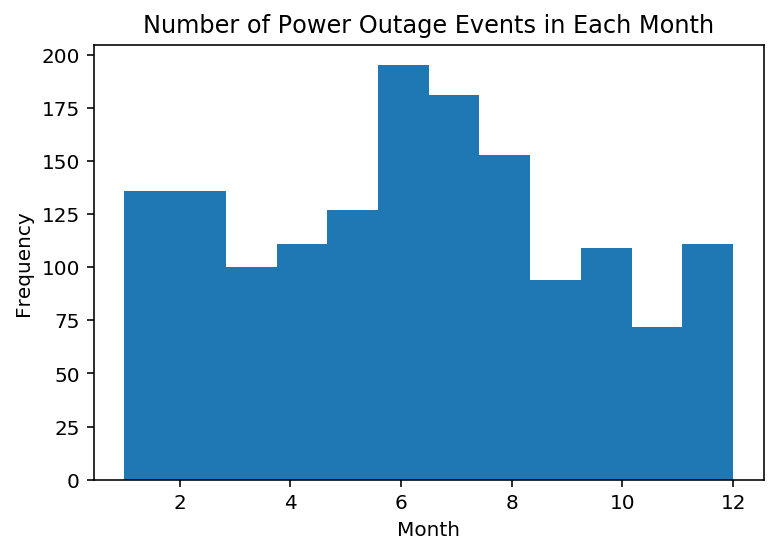

In [13]:
ax = power_outage['MONTH'].plot(kind='hist', bins = 12)
plt.xlabel('Month')
plt.title('Number of Power Outage Events in Each Month')
plt.show()

#### Distribution of Power Outage Occurrences In Each State
Afer using bar plots to visualize the distribution of power outage events in each state, I found that power outage occur most often in Minnesota and least often in Alaska.

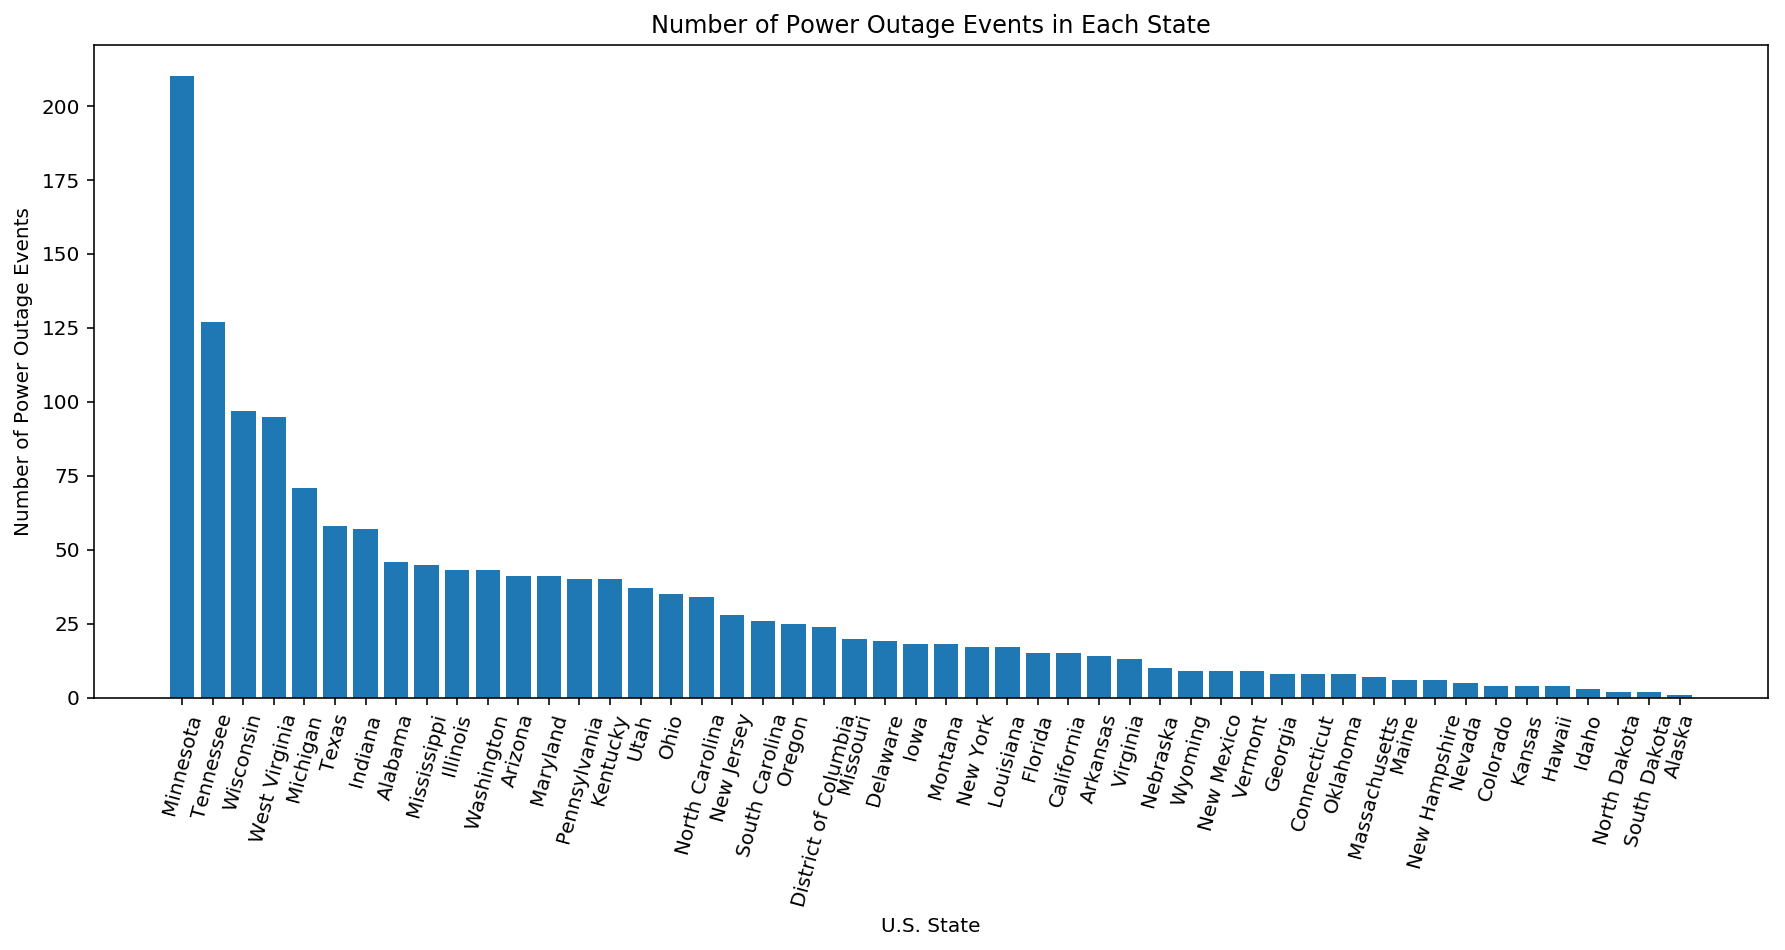

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(power_outage['U.S._STATE'].unique(), power_outage['U.S._STATE'].value_counts().values)
plt.xticks(rotation= 75)
plt.xlabel('U.S. State')
plt.ylabel('Number of Power Outage Events')
plt.title('Number of Power Outage Events in Each State')
plt.show()

#### Distribution of Power Outage Occurrences By Different Reason
First, I used bar plots to visualize the number of power outage events caused by different reasons. Then, I used value_counts function to calculate the proportion of power outage events caused by each reason. From bar plot and proportion table below, I found that about half of power outage events were caused by severe weather. Moreover, similar number of power outage events were caused by equipment failure, public appeal, fuel supply emergency, and islanding.

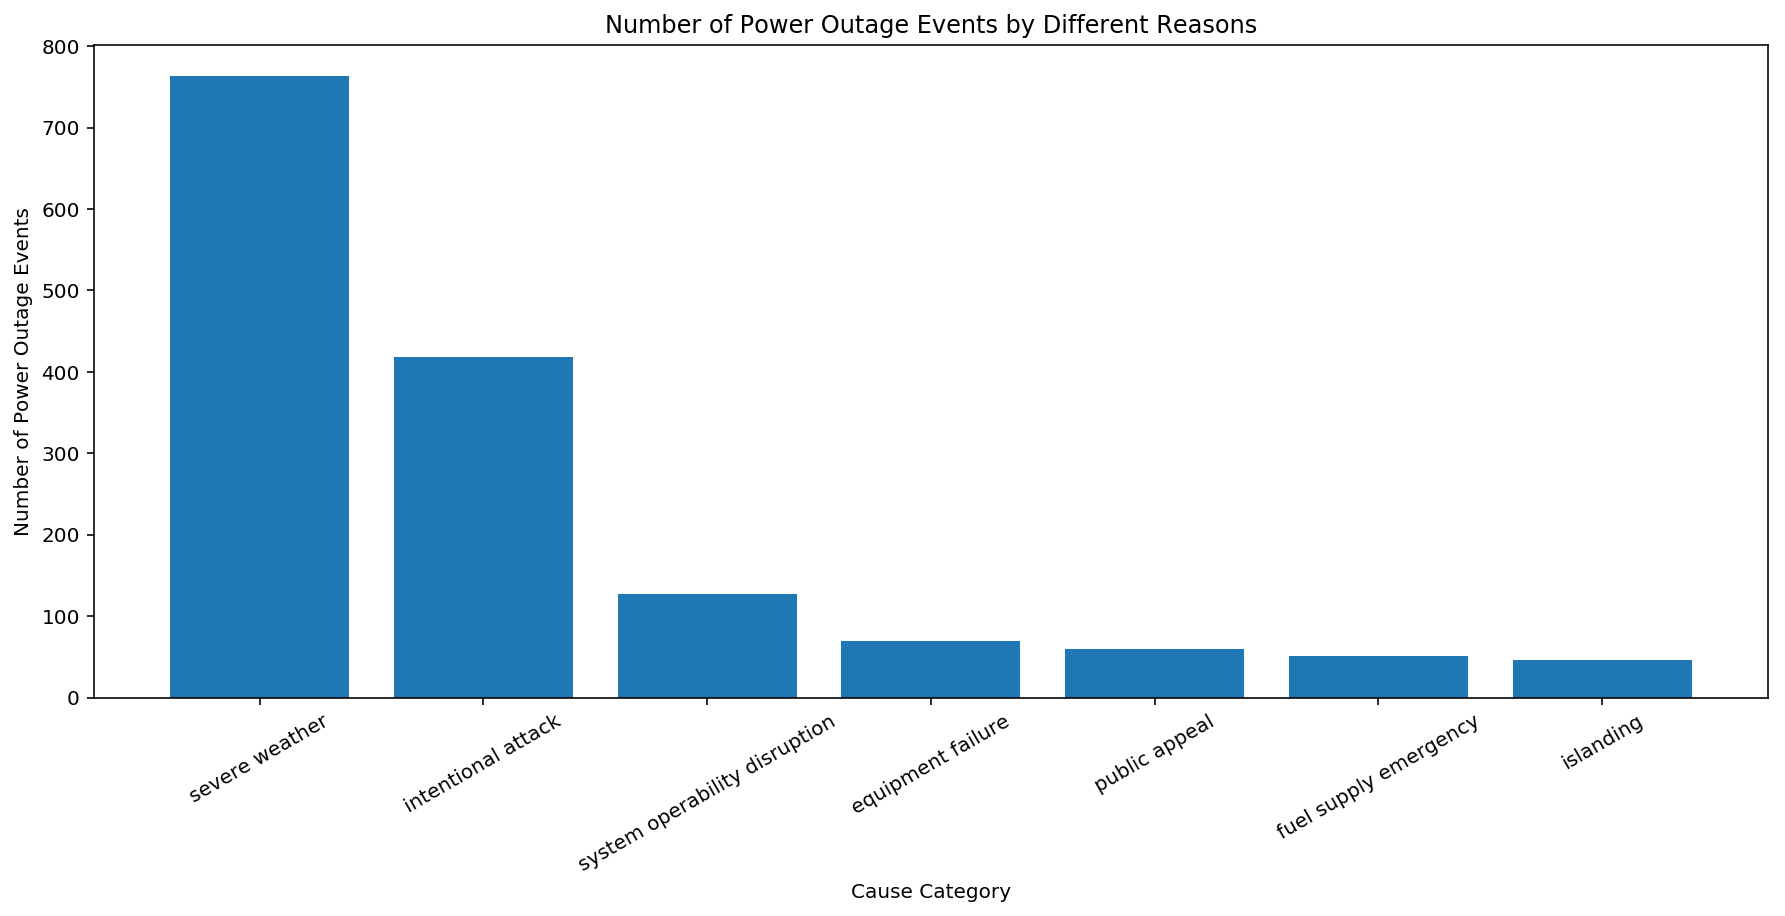

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(power_outage['CAUSE.CATEGORY'].unique(), power_outage['CAUSE.CATEGORY'].value_counts().values)
plt.xticks(rotation= 30)
plt.xlabel('Cause Category')
plt.ylabel('Number of Power Outage Events')
plt.title('Number of Power Outage Events by Different Reasons')
plt.show()

In [16]:
power_outage['CAUSE.CATEGORY'].value_counts(normalize = True)

severe weather                   0.497392
intentional attack               0.272490
system operability disruption    0.082790
public appeal                    0.044980
equipment failure                0.039113
fuel supply emergency            0.033246
islanding                        0.029987
Name: CAUSE.CATEGORY, dtype: float64

#### Statistics calculated from `OUTAGE.DURATION (Days)` 
By calculating 25% and 75% percentile of `OUTAGE.DURATION (Days)`, I discovered that most power outage events last between 0 days 1 hour 42 minutes and 2 days. Then I calculated median, average, minimum, maximum power outage durations in days. From the result, I found that the outage event with maximum duration happened in Wisconsin in January 2014 and this outage was caused by fuel supply emergency.

In [17]:
# calculate 25% and 75% percentile of power outage duration in days
power_outage['OUTAGE.DURATION (Days)'].quantile([0.25, 0.75])

0.25   0 days 01:42:15
0.75   2 days 00:00:00
Name: OUTAGE.DURATION (Days), dtype: timedelta64[ns]

In [18]:
power_outage.agg({'OUTAGE.DURATION (Days)': ['median', 'mean', 'min', 'max']})

,OUTAGE.DURATION (Days)
median,0 days 11:41:00
mean,1 days 19:45:16.585365
min,0 days 00:00:00
max,75 days 11:53:00


In [19]:
# get the outage event with longest power outage duration
power_outage.loc[power_outage['OUTAGE.DURATION (Days)'] == power_outage['OUTAGE.DURATION (Days)'].max()]

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION (Mins),DEMAND.LOSS.MW (MW),CUSTOMERS.AFFECTED,TOTAL.PRICE (cts/kWh),OUTAGE.START,OUTAGE.RESTORATION,OUTAGE.DURATION (Days)
53,2014,1,Wisconsin,WI,cold,fuel supply emergency,Coal,NaN,108653.0,NaN,NaN,10.28,2014-01-24,2014-04-09 11:53:00,75 days 11:53:00


#### Statistics calculated from `CUSTOMERS.AFFECTED` 
By calculating 25% and 75% percentile of `CUSTOMERS.AFFECTED`, I discovered that most of number of customers affected are between 9650 and 150000. Then I calculated median, average, minimum, maximum number of customers affected. From the result, I found that power outage event that affects most number of customers happened in Florida in October 2010 and it was caused by severe weather.

In [20]:
# calculate 25% and 75% percentile of number of customers affected by power outage
power_outage['CUSTOMERS.AFFECTED'].quantile([0.25, 0.75])

0.25      9650.0
0.75    150000.0
Name: CUSTOMERS.AFFECTED, dtype: float64

In [21]:
power_outage.agg({'CUSTOMERS.AFFECTED': ['median', 'mean', 'min', 'max']})

,CUSTOMERS.AFFECTED
median,7.013500e+04
mean,1.434562e+05
min,0.000000e+00
max,3.241437e+06


In [22]:
# get the row where number of customers affected by outage event is the maximum
power_outage.loc[power_outage['CUSTOMERS.AFFECTED'] == power_outage['CUSTOMERS.AFFECTED'].max()]

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,CLIMATE.CATEGORY,CAUSE.CATEGORY,CAUSE.CATEGORY.DETAIL,HURRICANE.NAMES,OUTAGE.DURATION (Mins),DEMAND.LOSS.MW (MW),CUSTOMERS.AFFECTED,TOTAL.PRICE (cts/kWh),OUTAGE.START,OUTAGE.RESTORATION,OUTAGE.DURATION (Days)
1066,2005,10,Florida,FL,normal,severe weather,hurricanes,Wilma,1080.0,10000,3241437.0,8.93,2005-10-23 20:00:00,2005-10-24 14:00:00,18:00:00


### Bivariate Analysis

#### `CAUSE.CATEGORY` And `OUTAGE.DURATION (Mins)`
I plotted the boxplot to see if outage durations vary based on different causations of outage events. From the plot, I found 
that events caused by fuel supply emergency have largest median outage durations and largest duration range, and events caused by severe weather have the second largest median outage durations. Also, events caused by equipment failure have the second largest duration range. Events caused by system operability disruption, equipment failure, and islanding do not have long outage durations.

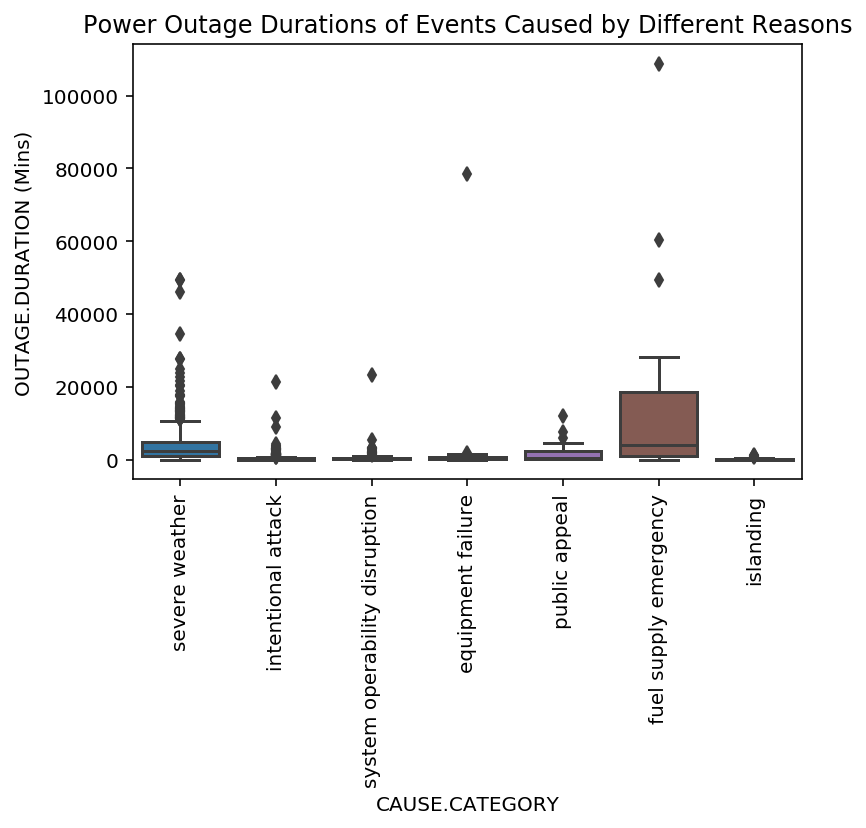

In [23]:
ax = sns.boxplot(x='CAUSE.CATEGORY', y='OUTAGE.DURATION (Mins)', data = power_outage)
plt.xticks(rotation= 90)
plt.title('Power Outage Durations of Events Caused by Different Reasons')
plt.show()

#### `OUTAGE.DURATION (Mins)` And `CUSTOMERS.AFFECTED`
I plotted the scatterplot to see if outage duration in minutes is positively correlated with number of customers affected. However, the scatterplot does not show a positive relationship between outage duration in minutes and number of customers affected.

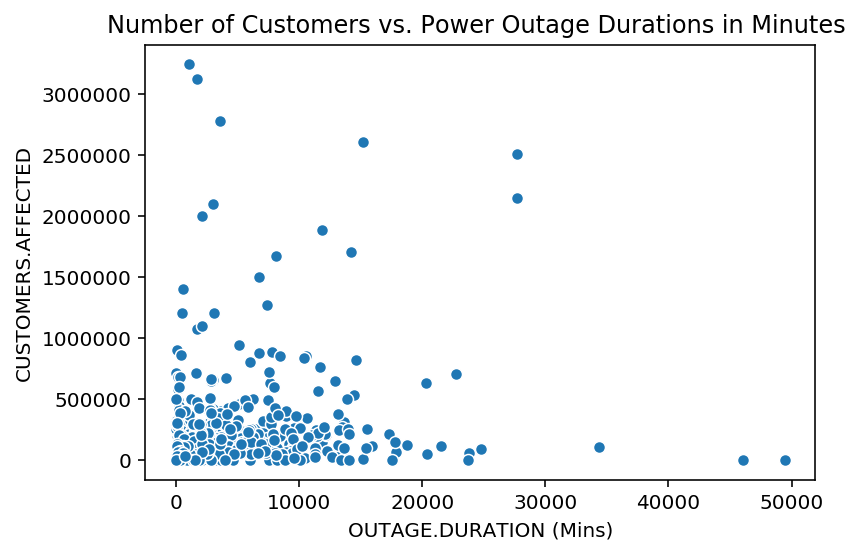

In [24]:
sns.scatterplot(x = 'OUTAGE.DURATION (Mins)', y = 'CUSTOMERS.AFFECTED', data = power_outage)
plt.title('Number of Customers vs. Power Outage Durations in Minutes ')
plt.show()

#### `CUSTOMERS.AFFECTED` And `OUTAGE.DURATION (Mins)`
I plotted the scatterplot to see if number of customers affected is positively associated with amount of peak demand lost. The scatterplot shows a somewhat positive association between two variables.

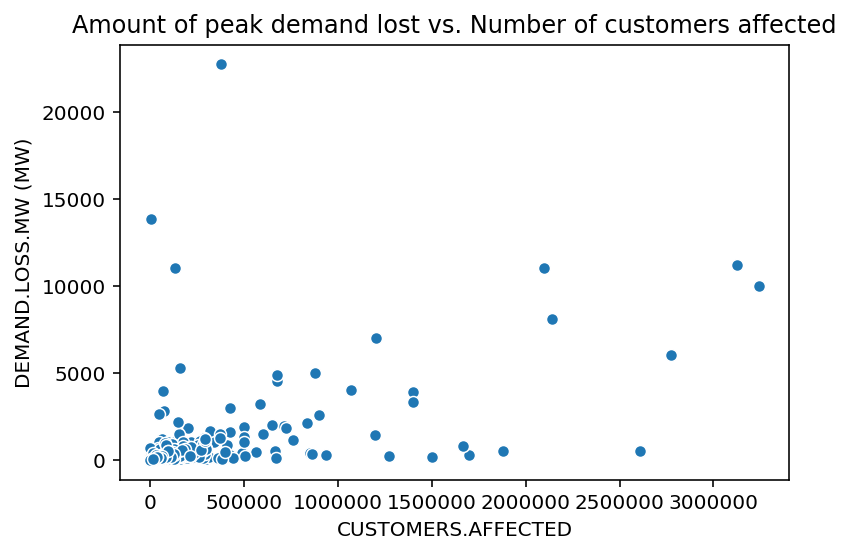

In [25]:
sns.scatterplot(x = 'CUSTOMERS.AFFECTED', y = 'DEMAND.LOSS.MW (MW)', data = power_outage)
plt.title('Amount of peak demand lost vs. Number of customers affected')
plt.show()

#### `CAUSE.CATEGORY` And `CLIMATE.CATEGORY`
By creating a pivot table grouped by `CAUSE.CATEGORY` and `CLIMATE.CATEGORY`, I examined in each weather condition, which `CAUSE.CATEGORY` can cause outage events with the largest extent of influence on customers and power outage durations on average. In cold and normal weather conditions, outage events caused by system operability disruption affect the largest number of customers on average, while in warm weather condition, outage events caused by severe weather affect the largest number of customers on average. Events caused by fuel supply emergency have longest outage duration on average in all three weather conditions.

In [26]:
power_outage.pivot_table(index = 'CAUSE.CATEGORY', columns = 'CLIMATE.CATEGORY', 
                         aggfunc = {'CUSTOMERS.AFFECTED': np.mean, 'OUTAGE.DURATION (Mins)': 
                                    np.mean}).idxmax()

                        CLIMATE.CATEGORY
CUSTOMERS.AFFECTED      cold                system operability disruption
                        normal              system operability disruption
                        warm                               severe weather
OUTAGE.DURATION (Mins)  cold                        fuel supply emergency
                        normal                      fuel supply emergency
                        warm                        fuel supply emergency
dtype: object

### Aggregates

I groupped by U.S. states and calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that the outage event with longest average outage duration happened in Wisconsin and the outage event that affected the largest number of customers on average happened in Florida.

In [27]:
power_outage.groupby('U.S._STATE').mean()[['OUTAGE.DURATION (Mins)', 'CUSTOMERS.AFFECTED']].idxmax()

OUTAGE.DURATION (Mins)    Wisconsin
CUSTOMERS.AFFECTED          Florida
dtype: object

I groupped by causes of outage events and calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that fuel supply emergency caused the outage event with longest average outage duration in minutes and system operability disruption caused the outage event that affected the largest number of customers on average.

In [28]:
power_outage.groupby('CAUSE.CATEGORY').mean()[['OUTAGE.DURATION (Mins)', 'CUSTOMERS.AFFECTED']].idxmax()

OUTAGE.DURATION (Mins)            fuel supply emergency
CUSTOMERS.AFFECTED        system operability disruption
dtype: object

I groupped by causes of outage events and month. Then I calculated the average of outage duration in minutes and that of number of customers affected. By using idxmax, I found that fuel supply emergency in January caused the outage event with longest average outage duration in minutes and system operability disruption in September caused the outage event that affected the largest number of customers on average.

In [29]:
power_outage.groupby(['CAUSE.CATEGORY', 'MONTH']).mean()[['OUTAGE.DURATION (Mins)', 'CUSTOMERS.AFFECTED']].idxmax()

OUTAGE.DURATION (Mins)    (fuel supply emergency, 1)
CUSTOMERS.AFFECTED            (equipment failure, 9)
dtype: object

### Assessment of Missingness

#### Missingness of `HURRICANE.NAMES`
After I checked the shape of outage dataframe whose `CAUSE.CATEGORY.DETAIL` value is hurricane and that of dataframe whose `HURRICANE.NAMES` is not null, I found that their shapes are approximately the same. So, I believe that data in `HURRICANE.NAMES` is NMAR. When `CAUSE.CATEGORY.DETAIL` is hurricane, then `HURRICANE.NAMES` is not null and contains the hurricane name that causes the power outage event. If the cause of outage events is not hurricane or not specified, the name of hurricane that causes outage event is null.

In [30]:
power_outage[power_outage['CAUSE.CATEGORY.DETAIL'] == 'hurricanes'].shape

(74, 15)

In [31]:
power_outage[power_outage['HURRICANE.NAMES'].notnull()].shape

(72, 15)

I chose to analyze the missingness of `CUSTOMERS.AFFECTED` and its dependency on `OUTAGE.DURATION (Mins)` and `TOTAL.PRICE (cts/kWh)`.


#### Analyzing the dependency of missingness in `CUSTOMERS.AFFECTED` on `OUTAGE.DURATION (Mins)`

**Null Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` does not depend on `OUTAGE.DURATION (Mins)`

**Alternative Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` depends on `OUTAGE.DURATION (Mins)`

**Test Statistic:** Difference in means of `OUTAGE.DURATION (Mins)` in null and not null group

**Significance Level:** 0.05 (5%)

In [32]:
results = []
for i in range(1000):
    # shuffle outage duration (in minutes) column
    shuffled_duration = power_outage['OUTAGE.DURATION (Mins)'].sample(replace = False, frac = 1).reset_index(drop = True)
    # create a new table with shuffled duration column and a column indicating whether'CUSTOMERS.AFFECTED' is null
    shuffled = power_outage.assign(**{'OUTAGE.DURATION (Mins)': shuffled_duration,
                                    'is_null': power_outage['CUSTOMERS.AFFECTED'].isnull()})
    # groupby 'is_null' column and compute the differences in means of outage duration (in minutes)
    avg = shuffled.groupby('is_null')['OUTAGE.DURATION (Mins)'].mean().diff().abs().iloc[-1]
    results.append(avg)

In [33]:
# assign a column indicating whether'CUSTOMERS.AFFECTED' is null
# group by it
# compute the differences in means of outage duration (in minutes)
obs = power_outage.assign(is_null = power_outage['CUSTOMERS.AFFECTED'].isnull()).groupby('is_null')['OUTAGE.DURATION (Mins)'].mean().diff().abs().iloc[-1]

#### Conclusion
Since p-value is 0.024 and it is less than significance level of 0.05, we reject the null hypothesis that missingness of `CUSTOMERS.AFFECTED` is not dependent on `OUTAGE.DURATION (Mins)`.

0.017

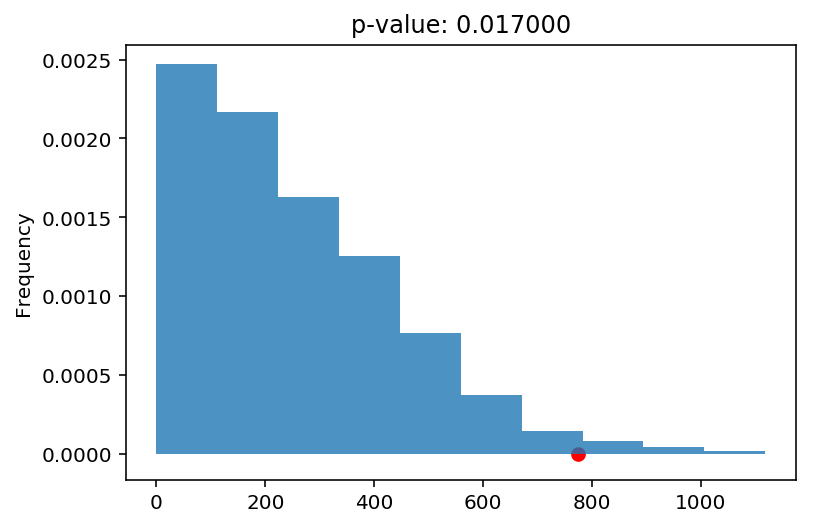

In [34]:
pval = np.mean(results > obs)
pd.Series(results).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);
pval

#### Analyzing the dependency of missingness in `CUSTOMERS.AFFECTED` on `TOTAL.PRICE (cts/kWh)`

**Null Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` does not depend on `TOTAL.PRICE (cts/kWh)`

**Alternative Hypothesis:** The missingness of `CUSTOMERS.AFFECTED` depends on `TOTAL.PRICE (cts/kWh)`

**Test Statistic:** Difference in means of `TOTAL.PRICE (cts/kWh)` in null and not null group

**Significance Level:** 0.05 (5%)

In [35]:
results = []
for i in range(1000):
    # shuffle TOTAL.PRICE column
    shuffled_demand = power_outage['TOTAL.PRICE (cts/kWh)'].sample(replace = False, frac = 1).reset_index(drop = True)
    # create a new table with shuffled TOTAL.PRICE column and a column indicating whether'CUSTOMERS.AFFECTED' is null
    shuffled = power_outage.assign(**{'TOTAL.PRICE (cts/kWh)': shuffled_demand,
                                    'is_null': power_outage['CUSTOMERS.AFFECTED'].isnull()})
    # groupby 'is_null' column and compute the differences in means of TOTAL.PRICE
    avg = shuffled.groupby('is_null')['TOTAL.PRICE (cts/kWh)'].mean().diff().abs().iloc[-1]
    results.append(avg)

In [36]:
# assign a column indicating whether'CUSTOMERS.AFFECTED' is null
# group by it
# compute the differences in means of TOTAL.PRICE
obs = power_outage.assign(is_null = power_outage['CUSTOMERS.AFFECTED'].isnull()).groupby('is_null')['TOTAL.PRICE (cts/kWh)'].mean().diff().abs().iloc[-1]

#### Conclusion
Since p-value is 0.453 and it is greater than significance level of 0.05, we fail to reject the null hypothesis that missingness of `CUSTOMERS.AFFECTED` is not dependent on `TOTAL.PRICE (cts/kWh)`.

0.496

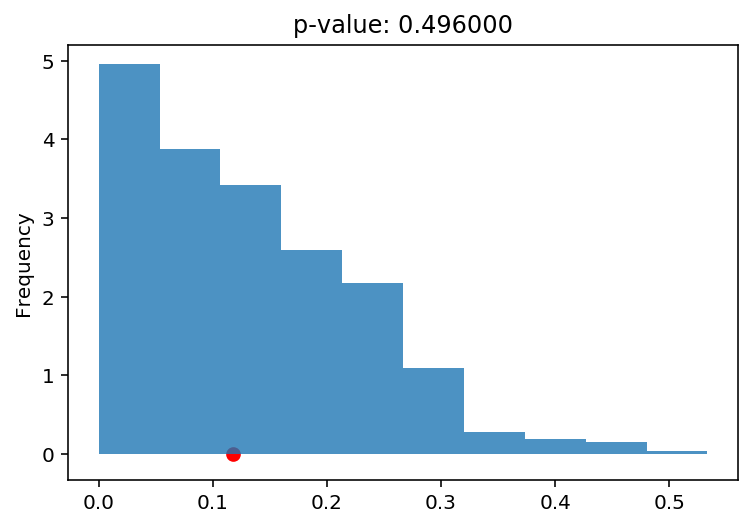

In [37]:
pval = np.mean(results > obs)
pd.Series(results).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);
pval

### Hypothesis Test

**Hypothesis Question:** On average, is number of customers affected by outage events caused by severe weather more than number of customers affected by outage events caused by other reasons?

**Null Hypothesis:** On average, number of customers affected by outage events caused by severe weather is approximately the same with number of customers affected by outage events caused by other reasons.

**Alternative Hypothesis:** On average, number of customers affected by outage events caused by severe weather is more than number of customers affected by outage events caused by other reasons.

**Probability Model:** Sample uniformly (without replacement) 763 power outage events (same number with the number of outage events caused by severe weather) from outage dataframe. 

**Test Statistic:** The average number of customers affected from each random sample.

**Significance Level:** 0.05 (5%)

#### Perform Hypothesis Testing

In [38]:
# calculate how many power outage events are caused by severe weather condition 
sample_size = (power_outage['CAUSE.CATEGORY'] == 'severe weather').sum()
sample_size

763

In [39]:
# run hypothesis test
results = []
for i in np.arange(1000):
    # sample uniformly (without replacement) the same number of outage events caused by severe weather from df
    random_sample = power_outage.sample(sample_size, replace = False)
    # calculate the average number of customers affected from each random sample
    new_average = np.mean(random_sample['CUSTOMERS.AFFECTED'])
    results.append(new_average)

In [40]:
# calculate the average number of customers affected by events caused by severe weather condition
obs = power_outage.loc[power_outage['CAUSE.CATEGORY'] == 'severe weather','CUSTOMERS.AFFECTED'].mean()
obs

188574.8019525802

#### Conclusion
Since p-value is 0.0 and it is less than significance level of 0.05, we reject the null hypothesis that on average, number of customers affected by outage events caused by severe weather is approximately the same with number of customers affected by outage events caused by other reasons.

0.0

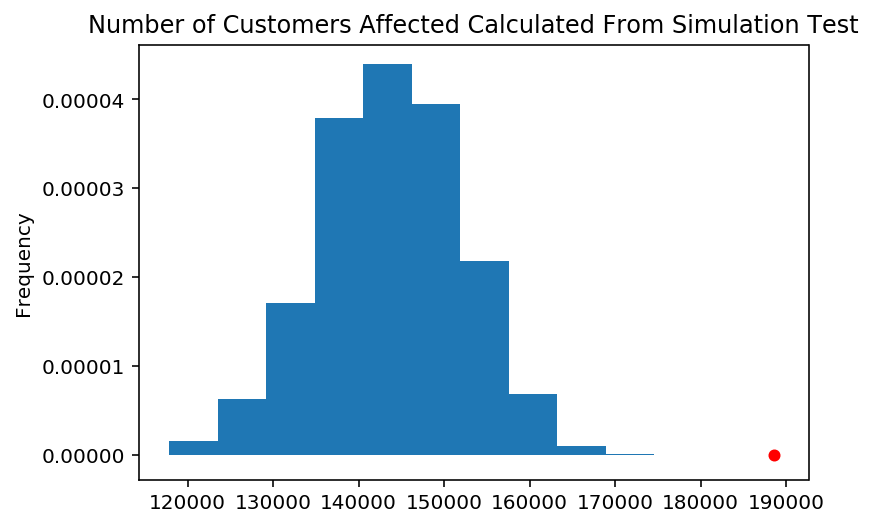

In [41]:
pval = np.mean(np.array(results) >= obs)
pd.Series(results).plot(kind='hist', density=True, title='Number of Customers Affected Calculated From Simulation Test');
plt.scatter(obs, 0, s=25, c='r');
pval